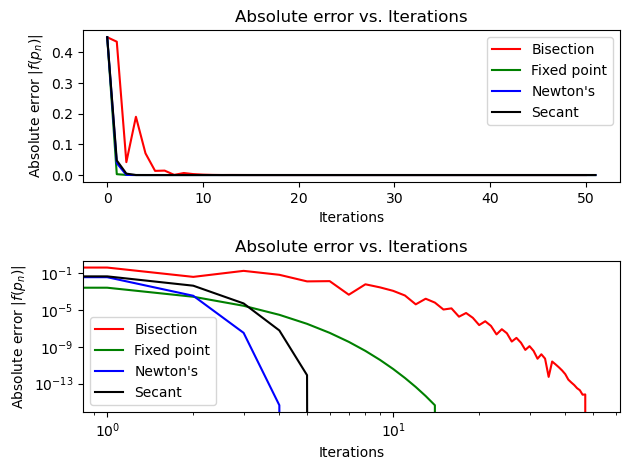

In [185]:
import numpy as np
import matplotlib.pyplot as plt

#define function
def my_fun(x, test):
    if test == 1: #f_1(x), root at x = 1
        y = 1/2 * np.sin((x - 1) ** 3)
    if test == 2: #f_2(x)
        y = 6 ** -x - 2
    return y

#define derivative of function
def my_fun_deriv(x, test):
    if test == 1: #f_1'(x)
        y = 1/2 * 3 * (x - 1) ** 2 * np.cos((x - 1) ** 3)
    if test == 2: #f_2'(x)
        y = -np.log(6) * 6 ** -x
    return y

N = 50 #number of iterations, adjusted to # of iterations for slowest converging algorithm
epsilon = 1e-8 #tolerance, checked against absolute error
test = 2 #test function selection

#helper functions
def sgn(x): #signum function
    if x < 0:
        return -1
    if x == 0:
        return 0
    if x > 0:
        return 1
def fp(x, test): #g(x) for fixed point iteration
    if test == 1:
        return x - 1000 * my_fun(x, test)
    if test == 2:
        return x + 1/4 * my_fun(x, test)

#bisection method
def Bisection(a, b): #based on algorithm 2.1
    #lower endpoint a, upper endpoint b
    i = 0 #iteration
    p = a + (b - a)/2 #initial approximation
    p_arr = np.array([]) #store approximations
    while i <= N  or np.abs(my_fun(p, test)) > epsilon: #ensure algorithms run for same number of iterations
        i += 1
        p = a + (b - a)/2
        p_arr = np.append(p_arr, p)
        if sgn(my_fun(p, test)) == 0: #if exact root found, set endpoints to root
            a, b = p, p
        elif sgn(my_fun(a, test)) * sgn(my_fun(p, test)) > 0:
            a = p
        else:
            b = p
    return p_arr

def Fixed_Point(p): #based on algorithm 2.2
    #initial guess p
    i = 0 #iteration
    p_arr = np.array([p]) #store approximations
    while i <= N or np.abs(my_fun(p, test)) > epsilon: #ensure algorithms run for same number of iterations
        i += 1
        p = fp(p, test)
        p_arr = np.append(p_arr, p)
    return p_arr

def Newton(p): #based on algorithm 2.3
    #initial guess p
    i = 0 #iteration
    p_arr = np.array([p]) #store approximations
    while i <= N or np.abs(my_fun(p, test)) > epsilon: #ensure algorithms run for same number of iterations
        i += 1
        p = p - my_fun(p, test) / my_fun_deriv(p, test)
        p_arr = np.append(p_arr, p)
    return p_arr
    
def Secant(p, p_prev): #based on algorithm 2.4
    #initial guesses p, p_prev
    i = 1
    p_arr = np.array([p_prev, p])
    while i <= N or np.abs(my_fun(p, test)) > epsilon: #ensure algorithms run for same number of iterations
        i += 1
        if p != p_prev: #avoid zero division error
            p, p_prev = p - my_fun(p, test) * (p - p_prev)/(my_fun(p, test) - my_fun(p_prev, test)), p
        p_arr = np.append(p_arr, p)
    return p_arr

#store approximation arrays to minimize function calls
if test == 1:
    p_bisection = Bisection(0.93, 1.03)
    p_fixedpoint = Fixed_Point(0.98)
    p_newton = Newton(0.98)
    p_secant = Secant(0.99,0.98)
if test == 2:
    p_bisection = Bisection(-1, 0)
    p_fixedpoint = Fixed_Point(-0.5)
    p_newton = Newton(-0.5)
    p_secant = Secant(-0.4,-0.5)
fig, (ax1, ax2) = plt.subplots(2, 1)

#plot absolute error vs iterations
ax1.plot(np.abs(my_fun(p_bisection, test)), "r-", label="Bisection")
ax1.plot(np.abs(my_fun(p_fixedpoint, test)), "g-", label="Fixed point")
ax1.plot(np.abs(my_fun(p_newton, test)), "b-", label="Newton's")
ax1.plot(np.abs(my_fun(p_secant, test)), "k-", label="Secant")
ax1.set_xlabel("Iterations")
ax1.set_ylabel("Absolute error $|f(p_n)|$")
ax1.set_title("Absolute error vs. Iterations")
ax1.legend()

#plot log of absolute error vs log of iterations
ax2.plot(np.abs(my_fun(p_bisection, test)), "r-", label="Bisection")
ax2.plot(np.abs(my_fun(p_fixedpoint, test)), "g-", label="Fixed point")
ax2.plot(np.abs(my_fun(p_newton, test)), "b-", label="Newton's")
ax2.plot(np.abs(my_fun(p_secant, test)), "k-", label="Secant")
ax2.set_xlabel("Iterations")
ax2.set_ylabel("Absolute error $|f(p_n)|$")
ax2.set_title("Absolute error vs. Iterations")
ax2.legend()
ax2.loglog()
fig.tight_layout()
plt.show()